# Data mining based on Google trends

Considerations
====================


### Data mining and Google trends
- This notebook demonstrates how to mining data based on a google trends exploration.
- This is useful for automating the data gathering process, considering that it is possible to save the information obtained on the web, rather than simply viewing it.

###  Libraries:
- selenium: open a browser (webdriver - http://chromedriver.chromium.org/downloads) and do the automation of actions such as clicks, scrolls, ect ...
- pandas: we will need to work with dataframes.
- seaborn: plotting and styling the graphs.
- matplotlib: plotting charts.
- time: sometimes we need to give a short wait between actions.
- os: library to access local files and folders.

In [1]:
# pip install selenium --user
from selenium import webdriver

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

import pandas as pd 

# conda install -c anaconda seaborn=0.9.0
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np

import time
import os

sns.set()
%matplotlib inline

In [2]:
# request the term to be searched
def inquiry():
    
    inquiry=str(input("Input the term to be searched... \n"))
    
    # split transforms a string into a list of terms present in that string,
    term_input = '%20'.join(inquiry.split())
    
    return term_input, inquiry 

In [3]:
# acquire the term
term,inquiry = inquiry()

Input the term to be searched... 
data science


> This function receives a folder and returns the path of the most recent file within this folder. 
We will use it to acquire the csv files downloaded in our chromedriver. 
Use this to avoid a dependency on file names. 

In [4]:
# function that returns the most recent file on a page
def recent_file(path):
    files = os.listdir(path) # list the name of the files in the folder
    paths = [os.path.join(path, name) for name in files] # returns the full path of each file

    return max(paths, key=os.path.getctime) # returns the path of the most recent file in the folder

In [42]:
# plot time line
def plot(df , op , inquiry):
    df.dropna(inplace=True) # delete missing date in the dataframe
    
    if op=='geo':
        df.score=df.score.astype(np.int32) # change the type of the variable score to int

        plt.figure(figsize=(15,6));
        g=sns.barplot(data=df ,x='region', y='score' , palette="mako")
        g.set_xticklabels(df.region , rotation=270, fontsize=13 )
        g.set_yticklabels(range(0,101,10),fontsize=14 )
        g.set_yticks(range(0,101,10))
        g.set_title(" '{}' : SCORE BY REGION".format(inquiry), fontsize=14);
    
    elif op=='timeline':
        df.score=df.score.astype(np.int32) # change the type of the variable score to int

        plt.figure(figsize=(15,6))
        g=sns.lineplot(x='date', y='score', data=df , color='magenta', lw=4)
        g.set_xticklabels(df.date, rotation=270, fontsize=13 )
        g.set_yticklabels(range(0,101,10),fontsize=14 )
        g.set_yticks(range(0,101,10))
        g.set_title(" '{}' : LAST 12 MONTHS (BRASIL)".format(inquiry), fontsize=14);
        
    else:
        print("invalid option... \n")

In [43]:
# get download folder
download_path = '/'.join(os.getcwd().split('/')[:3]) + '/Downloads/'

In [44]:
# create an webdriver instance
driver = webdriver.Chrome('./chromedriver')

# driver.fullscreen_window() #maximize window
driver.get('https://trends.google.com.br/trends/?geo=BR')

# Use 'Sleep' to prevent our program from executing the next statement without first loading the contents of the pag
time.sleep(0.5)


In [45]:
# request the term to be searched
try:
    # search request
    driver.get('https://trends.google.com.br/trends/explore?geo=BR&q={}'.format(term))
    
    # wait the page load
    time.sleep(1)

except Exception as e:
    print(e)
    pass

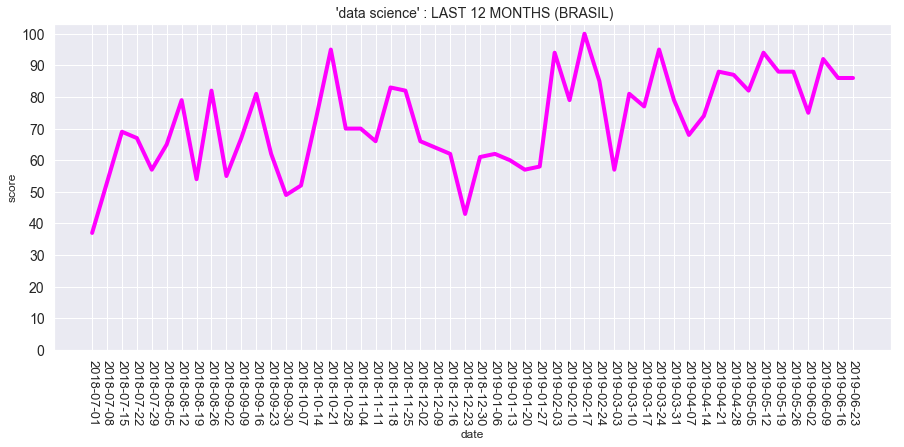

In [46]:
# plot response (csv)
try:
    # act the download event
    first_button = driver.find_elements_by_xpath("""//*[@class="widget-actions-item export"]""")[0]
    first_button.click()

    # wait for the .csv file download
    time.sleep(1)

    # persist the most recent file to the folder 'Downloads'
    csv1 = recent_file(download_path)

    # instanciate the 1st csv the most recent csv path
    DF_TIMELINE = pd.read_csv(csv1, names=['Semana','data science']).iloc[2:].reset_index(drop=True)
    
    DF_TIMELINE.columns = DF_TIMELINE.columns.str.replace('data science','score')    
    DF_TIMELINE.columns = DF_TIMELINE.columns.str.replace('Semana','date')

    # plot timeline (last 12 months, by default)
    if DF_TIMELINE.shape[0] != 0:   
        plot(DF_TIMELINE,'timeline',inquiry)
        
    else:
        print("INSUFFICIENT DATA \n")

except Exception as e:
    print(e)
    pass